In [1]:
import catppuccin
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm, LinearSegmentedColormap, Normalize

import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import os

In [2]:
import visualizer
import dataparser

In [3]:
df = pd.read_csv("QF_SLIA_PARSED.csv")

In [18]:
df["task-clock:u"] = df["task-clock:u"].astype(float)
reduced_df = df[["solver", "problem", "status", "sanity_sat", "task-clock:u", "elapsed"]].copy()
reduced_df

,solver,problem,status,sanity_sat,task-clock:u,elapsed
0,z3noodler,out/benchmarks/non-incremental/QF_SLIA/2023032...,Success,unsat,23.80,0.025284
1,cvc5,out/benchmarks/non-incremental/QF_SLIA/2023032...,Success,unsat,3.74,0.004828
2,cvc5,out/benchmarks/non-incremental/QF_SLIA/2023032...,Success,unsat,23.24,0.024695
3,z3noodler,out/benchmarks/non-incremental/QF_SLIA/2023032...,Success,unsat,42.31,0.043679
4,ostrich,out/benchmarks/non-incremental/QF_SLIA/2023032...,Success,sat,2626.02,0.999602
...,...,...,...,...,...,...
370152,cvc5,out/benchmarks/non-incremental/QF_SLIA/2023033...,Success,sat,2804.97,2.806624
370153,cvc5,out/benchmarks/non-incremental/QF_SLIA/2023033...,Success,sat,6793.88,6.795504
370154,cvc5,out/benchmarks/non-incremental/QF_SLIA/2023033...,Success,sat,29077.48,29.079317
370155,cvc5,out/benchmarks/non-incremental/QF_SLIA/2023033...,Timeout,NaN,NaN,NaN


In [19]:
pivot_df = reduced_df.pivot(index='problem', columns='solver', values='task-clock:u')
pivot_df

solver,cvc5,ostrich,z3,z3alpha,z3noodler
problem,,,,,
out/benchmarks/non-incremental/QF_SLIA/2015-Norn/ChunkSplit/norn-benchmark-0,2.79,NaN,7.78,42.06,15.52
out/benchmarks/non-incremental/QF_SLIA/2015-Norn/ChunkSplit/norn-benchmark-1,4.19,NaN,14.03,48.79,18.17
out/benchmarks/non-incremental/QF_SLIA/2015-Norn/ChunkSplit/norn-benchmark-10,3.19,NaN,7.63,43.26,16.69
out/benchmarks/non-incremental/QF_SLIA/2015-Norn/ChunkSplit/norn-benchmark-11,2.38,NaN,6.42,41.41,14.72
out/benchmarks/non-incremental/QF_SLIA/2015-Norn/ChunkSplit/norn-benchmark-12,6.35,NaN,9.80,44.53,18.11
...,...,...,...,...,...
out/benchmarks/non-incremental/QF_SLIA/20240411-redos_attack_detection/unsat/995_attack,5.52,NaN,6.97,39.96,13.42
out/benchmarks/non-incremental/QF_SLIA/20240411-redos_attack_detection/unsat/996_attack,NaN,3394.83,16.95,50.27,939.42
out/benchmarks/non-incremental/QF_SLIA/20240411-redos_attack_detection/unsat/998_attack,NaN,3536.96,16.61,50.82,928.90


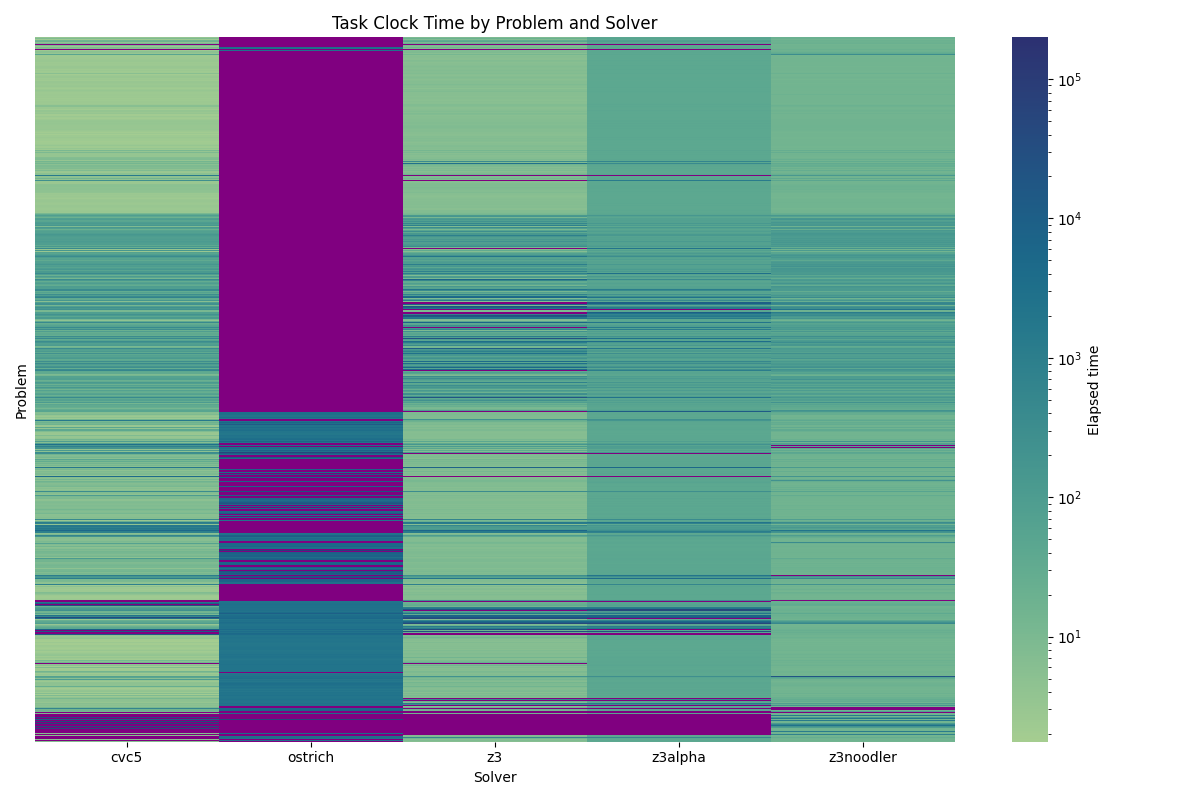

In [14]:
%matplotlib widget
bad_color = 'purple'
cmap = sns.color_palette("crest", as_cmap=True)
cmap.set_bad(bad_color)


plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_df,
    annot=False,
    fmt=".2f",
    cbar_kws={'label': 'Elapsed time'},
    norm=LogNorm(),
    cmap=cmap
)

# Title and labels
plt.title('Task Clock Time by Problem and Solver')
plt.xlabel('Solver')
plt.ylabel('Problem')

plt.yticks([])
plt.xticks()


plt.tight_layout()

In [ ]:
###### Modify 'folder' column using .loc
reduced_df.loc[:, 'folder'] = reduced_df['problem'].apply(lambda x: os.path.dirname(x))

# Apply the second transformation on 'folder' using .loc
reduced_df.loc[:, 'folder'] = reduced_df['problem'].apply(
    lambda x: '/'.join(x.split(os.sep)[4:][:-1])  # Remove the first three directories
)

# Modify 'problem' column using .loc
reduced_df.loc[:, 'problem'] = reduced_df['problem'].apply(
    lambda x: x.split("/")[-1]
)

In [8]:
pivot_df = reduced_df.pivot(index=["folder", 'problem'], columns='solver', values='task-clock:u')

In [9]:
folders = pivot_df.index.get_level_values('folder')
y_labels = np.where(folders.duplicated(keep='first'), "", folders)

In [10]:
new_index = []
new_pivot_df = []

last_folder = None
empty_rows_count = 100  # Number of empty rows to add between folders
for i, (folder, row) in enumerate(pivot_df.iterrows()):
    # Add multiple blank rows between different folders
    if folder[0] != last_folder:
        for _ in range(empty_rows_count):  # Add 5 blank rows
            new_index.append(('', ''))  # Blank row
            new_pivot_df.append([np.nan] * len(pivot_df.columns))  # NaN values for blank row
    new_index.append(folder)
    new_pivot_df.append(row)
    last_folder = folder[0]

In [11]:
pivot_df_with_blanks = pd.DataFrame(new_pivot_df, index=pd.MultiIndex.from_tuples(new_index, names=pivot_df.index.names), columns=pivot_df.columns)

In [12]:
folders = pivot_df.index.get_level_values('folder').unique()

In [13]:
%matplotlib widget

# Define the bad color for NaN values
bad_color = 'purple'  # You can change this to any color you'd like

# Create a subplot grid with enough rows for each folder
n_folders = len(folders)
fig, axes = plt.subplots(n_folders, 1, figsize=(12, 8 * n_folders))

# If there's only one folder, `axes` will not be an array, so we need to ensure it's iterable
if n_folders == 1:
    axes = [axes]

cmap = sns.color_palette("crest", as_cmap=True) # You can use any colormap you like
cmap.set_bad(bad_color)  # Set the "bad" color for NaN values

# Loop through each folder and plot its respective data in the corresponding subplot
for i, folder in enumerate(folders):
    # Filter the pivot table for the current folder
    folder_data = pivot_df.xs(folder, level='folder')

    # Create a mask for NaN values (or any other condition)
    mask = folder_data.isna()  # Mask NaN values

    # Plot the heatmap for the current folder
    sns.heatmap(
        folder_data,
        ax=axes[i],
        fmt=".2f",
        cbar_kws={'label': 'task-clock:u'},
        norm=LogNorm(),
        mask=mask,  # Apply the mask to NaN values
        cmap=cmap,  # Use the custom colormap with bad color
        cbar=False,  # Disable colorbar to avoid redundancy if it's not needed
    )

    # Set the title and labels for each subplot
    axes[i].set_title(f'Task Clock Time for Folder: {folder}')
    axes[i].set_xlabel('Solver')
    axes[i].set_ylabel('Problem')

    # Adding the colorbar to the first plot
    plt.colorbar(axes[i].get_children()[0], ax=axes[i], label="task-clock:u")

# Adjust layout
plt.tight_layout()

ValueError: Image size of 1200x120000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1200x120000 pixels is too large. It must be less than 2^16 in each direction.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

In [ ]:
mpl.pyplot.close()

In [ ]:
%matplotlib widget
plt.figure(figsize=(10, 6))
for solver in df['solver'].unique():
    subset = df[df['solver'] == solver]
    plt.scatter(subset['problem'], subset['elapsed'], label=solver)

plt.xlabel('Problem')
plt.ylabel('Elapsed Time')
plt.title('Elapsed Time per Problem by Solver')
plt.legend()
plt.xticks([])  # Rotate x-axis labels if they overlap
plt.show()

In [15]:
ostrich = df[df["solver"] == "ostrich"]
cvc = df[df["solver"] == "cvc5"]
noodler = df[df["solver"] == "z3noodler"]
alpha = df[df["solver"] == "z3alpha"]

In [16]:
success = df[df["status"] == "Success"]
success[~success["sanity_sat"].isin(["sat", "unsat"])]

,Unnamed: 0,problem,solver,status,sanity_sat,task-clock:u,context-switches:u,cpu-migrations:u,page-faults:u,cycles:u,...,branches:u,branch-misses:u,slots:u,topdown-retiring:u,topdown-bad-spec:u,topdown-fe-bound:u,topdown-be-bound:u,elapsed,user,sys
11812,11812,out/benchmarks/non-incremental/QF_SLIA/2019-Ji...,ostrich,Success,"(error ""Cannot handle literal str_replace(sigm...",2918.03,0.0,0.0,30650.0,9.428983e+09,...,2.053746e+09,61738431.0,4.073997e+10,7.438247e+09,2.215455e+10,9.734713e+09,9.721982e+09,1.032952,2.667739,0.282976
28529,28529,out/benchmarks/non-incremental/QF_SLIA/2023032...,ostrich,Success,"(error ""Comparison method violates its general...",2998.39,0.0,0.0,34747.0,9.683937e+09,...,2.327761e+09,64826302.0,4.303376e+10,8.751410e+09,2.428034e+10,9.847119e+09,9.747803e+09,0.975539,2.755574,0.280836
28669,28669,out/benchmarks/non-incremental/QF_SLIA/2023032...,ostrich,Success,"(error ""Comparison method violates its general...",3666.90,0.0,0.0,40514.0,1.199193e+10,...,3.645738e+09,91365462.0,5.821493e+10,1.477551e+10,3.327116e+10,1.315060e+10,9.468586e+09,1.411708,3.338735,0.363861
28730,28730,out/benchmarks/non-incremental/QF_SLIA/2023032...,ostrich,Success,"(error ""Comparison method violates its general...",4592.79,0.0,0.0,45978.0,1.485221e+10,...,4.562485e+09,105810556.0,7.237227e+10,1.958197e+10,3.965989e+10,1.673082e+10,1.219883e+10,1.749520,4.300279,0.327878
28760,28760,out/benchmarks/non-incremental/QF_SLIA/2023032...,ostrich,Success,"(error ""Comparison method violates its general...",3915.43,0.0,0.0,39676.0,1.296348e+10,...,3.486161e+09,86271108.0,5.884304e+10,1.401417e+10,3.439747e+10,1.227468e+10,1.307827e+10,1.150634,3.648873,0.304356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361768,361768,out/benchmarks/non-incremental/QF_SLIA/2024041...,cvc5,Success,cvc5 suffered a segfault.,42825.95,0.0,0.0,218519.0,1.518128e+11,...,8.242012e+10,18162156.0,7.570971e+11,4.472031e+11,1.811095e+11,4.750843e+10,1.594708e+11,43.468449,42.271991,0.442922
361932,361932,out/benchmarks/non-incremental/QF_SLIA/2024041...,cvc5,Success,cvc5 suffered a segfault.,41770.54,0.0,0.0,225329.0,1.480355e+11,...,8.197756e+10,16648280.0,7.376829e+11,4.441510e+11,1.562152e+11,4.530583e+10,1.473375e+11,42.176196,41.219295,0.461994
361963,361963,out/benchmarks/non-incremental/QF_SLIA/2024041...,cvc5,Success,cvc5 suffered a segfault.,42094.69,0.0,0.0,234016.0,1.493281e+11,...,8.191379e+10,16191093.0,7.375887e+11,4.481290e+11,1.214852e+11,4.755305e+10,1.500318e+11,42.555225,41.565205,0.403526
362090,362090,out/benchmarks/non-incremental/QF_SLIA/2024041...,cvc5,Success,cvc5 suffered a segfault.,35715.24,0.0,0.0,249020.0,1.261349e+11,...,6.306138e+10,18340044.0,6.209885e+11,3.259282e+11,1.850789e+11,4.270960e+10,1.451486e+11,36.387250,35.090429,0.525448
